# Goal Definition

# Importing Essential Libraries

In [191]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import boxcox
from scipy.stats import yeojohnson
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import r2_score
from sklearn.metrics import auc
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_classification, make_gaussian_quantiles
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import boxcox
from scipy.stats import yeojohnson
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
import imblearn
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where
from imblearn.under_sampling import RandomUnderSampler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import boxcox
from scipy.stats import yeojohnson
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from keras.losses import binary_crossentropy
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Input
# from tensorflow.keras.layers import Activation
# from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.optimizers import SGD
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV



# Loading Dataset

In [192]:
# Loading dataset

from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Dataset before encoding will be assigned the variable (df_be)

In [193]:
#  Reading Dataset and displaying first 5 rows
df_be = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning/Project/health_dataset.csv')
df_be.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Data Preprocessing

Dropping the unnecessary columns i.e Patient ID

In [194]:
df_be.drop(['id'], axis=1, inplace=True)

In [195]:
gender_counts = df_be['gender'].value_counts()
total_entries = len(df_be)
gender_percentages = (gender_counts / total_entries) * 100

print("Gender Percentages:")
print(gender_percentages)

Gender Percentages:
gender
Female    58.590998
Male      41.389432
Other      0.019569
Name: count, dtype: float64


In [196]:
gender_counts

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [197]:
df_be[df_be['gender']== 'Other']

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


We can see that the there is only one case of gender identified as (other), and it is  not labeled as stroke, in this case this instance is insignificant and best to be dropped to avoid having a designated category only for (other) when perfoming encoding

In [198]:
df_be.drop(df_be[df_be['gender']== 'Other'].index,inplace= True)
df_be.shape

(5109, 11)

In [199]:
df_be.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,4908.00000,5109.000000
mean,43.229986,0.097475,0.054022,106.140399,28.89456,0.048738
std,22.613575,0.296633,0.226084,45.285004,7.85432,0.215340
min,0.080000,0.000000,0.000000,55.120000,10.30000,0.000000
25%,25.000000,0.000000,0.000000,77.240000,23.50000,0.000000
50%,45.000000,0.000000,0.000000,91.880000,28.10000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.10000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.60000,1.000000


Exploring missing values

In [200]:
df_be.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [201]:
ratio_of_missing_data =(df_be["bmi"].isnull().sum() / df_be.shape[0]) * 100
print("Ratio of Missing Data",(ratio_of_missing_data),'%')


Ratio of Missing Data 3.9342337052260716 %


Missing bmi values represent almost 4% of the dataset, so based on the data size 5000+, we will not drop missing values in the bmi column

## Dealing with Missing Data, using Median

In [202]:
# # drop the missing values
# df_be.dropna(subset=['bmi'], inplace=True)

In [203]:
median_bmi =df_be['bmi'].median()
df_be['bmi'].fillna(median_bmi, inplace =True)

Checking data frame to confirm abscence of null data

In [204]:
df_be.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Dicovering data counts and distributions

In [205]:
df_be['stroke'].value_counts()

stroke
0    4860
1     249
Name: count, dtype: int64

The distribution analysis of the two classes above indicate that this dataset is imbalanced as only 249 cases out of 5000+ samples are labelled as stroke. Therefore, we will need to apply techniques to balance the dataset prior to model development.

In [206]:
categorical_features = ['gender', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 'smoking_status', 'stroke']
numerical_features = [ 'age', 'avg_glucose_level', 'bmi']

## Exploratory Data Analysis

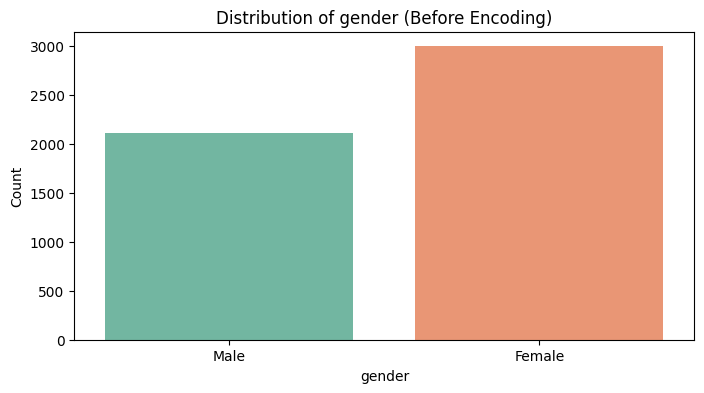

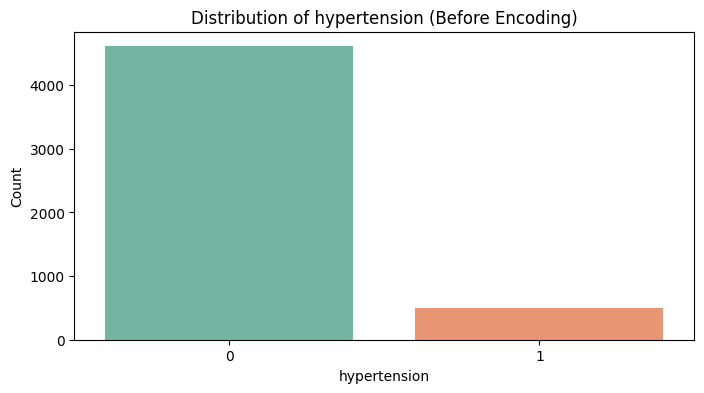

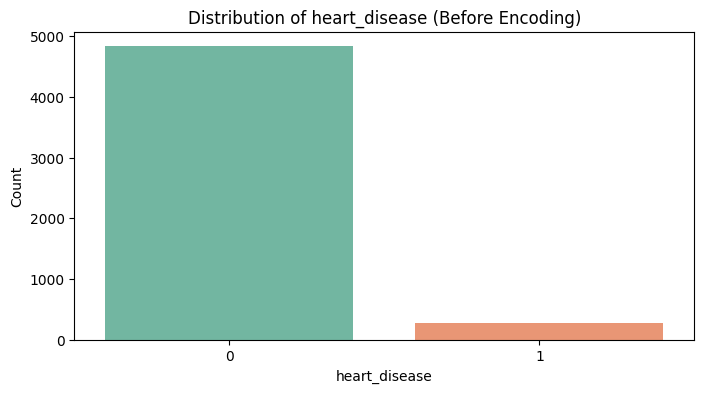

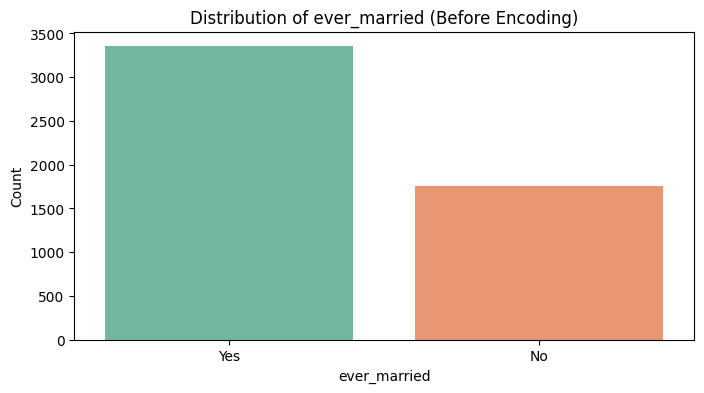

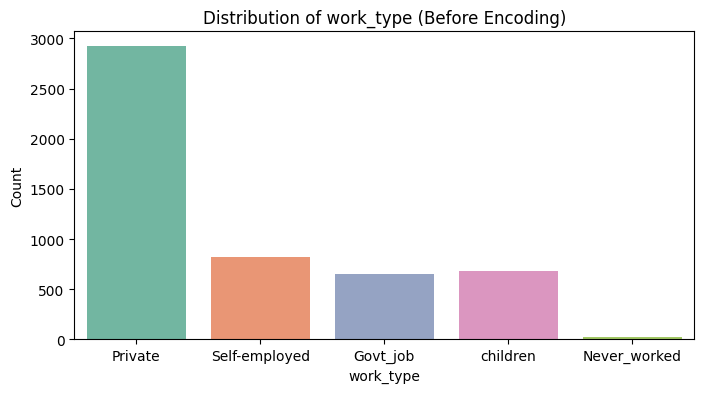

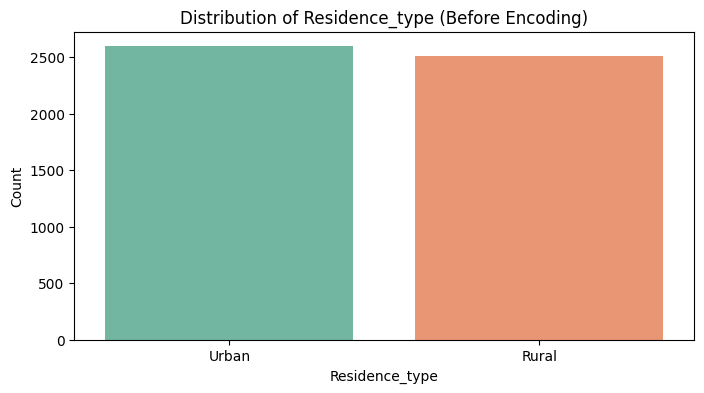

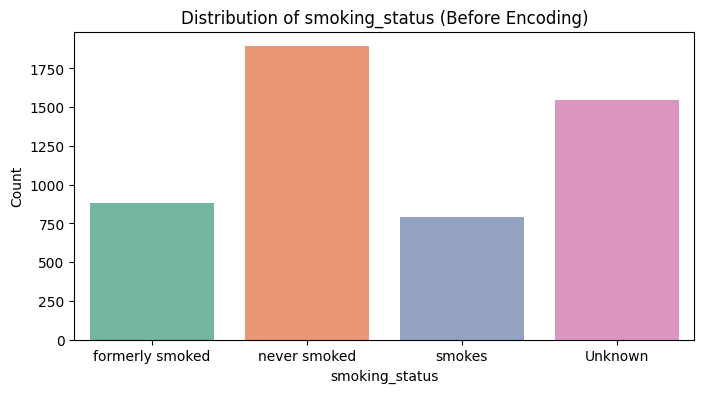

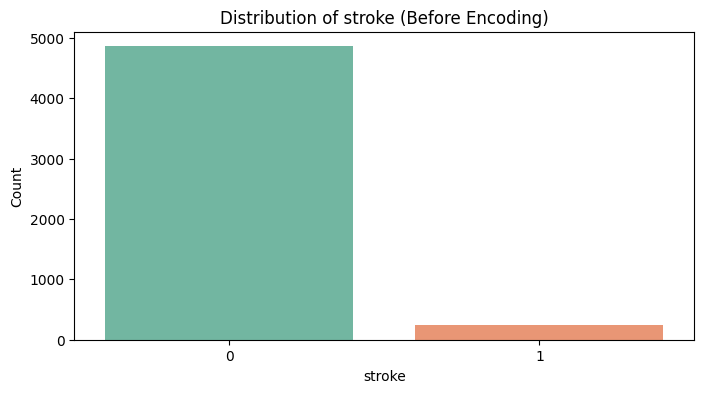

In [207]:
for feature in categorical_features:
   plt.figure(figsize=(8, 4))
   sns.countplot(data=df_be, x=feature, palette='Set2')
   plt.title(f'Distribution of {feature} (Before Encoding)')
   plt.xlabel(feature)
   plt.ylabel('Count')

   plt.show()

Distribution of categorical features using pie chart and percentage of occurrences

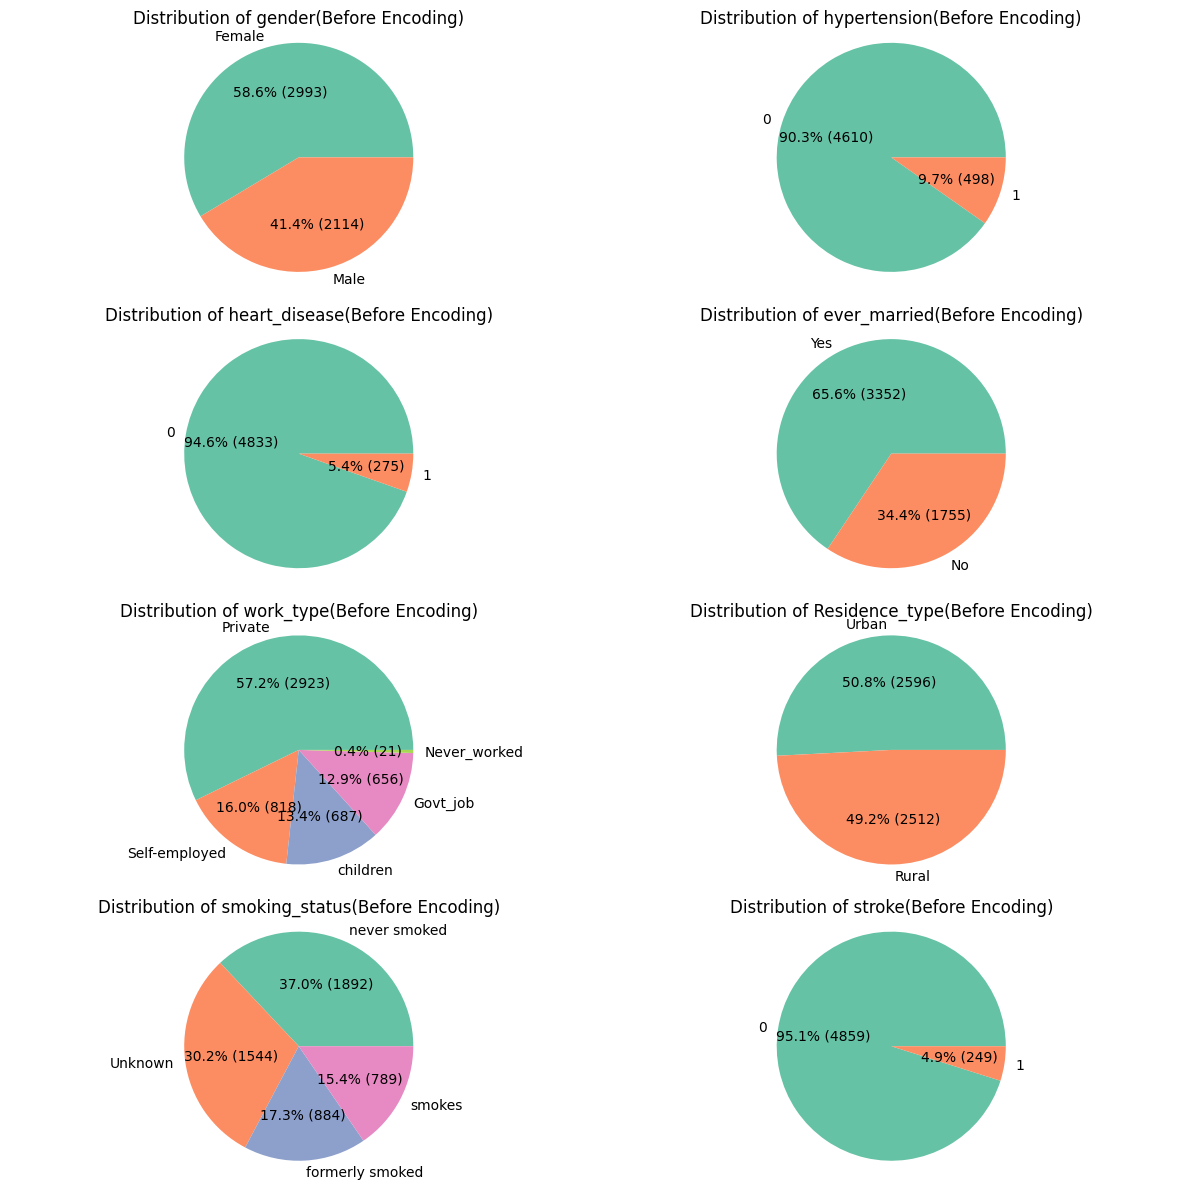

In [208]:
num_rows = 4
num_cols = 2
total_plots = num_rows * num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

for idx, feature in enumerate(categorical_features[:total_plots]):
    row = idx // num_cols
    col = idx % num_cols

    category_counts = df_be[feature].value_counts()

    axes[row, col].pie(category_counts, labels=category_counts.index, autopct=lambda pct: f"{pct:.1f}% ({int(pct * sum(category_counts)/100)})",colors=sns.color_palette('Set2', len(category_counts)))
    axes[row, col].set_title(f'Distribution of {feature}(Before Encoding)')
    axes[row, col].axis('equal')

plt.tight_layout()
plt.show()


Distribution of features - numerical features

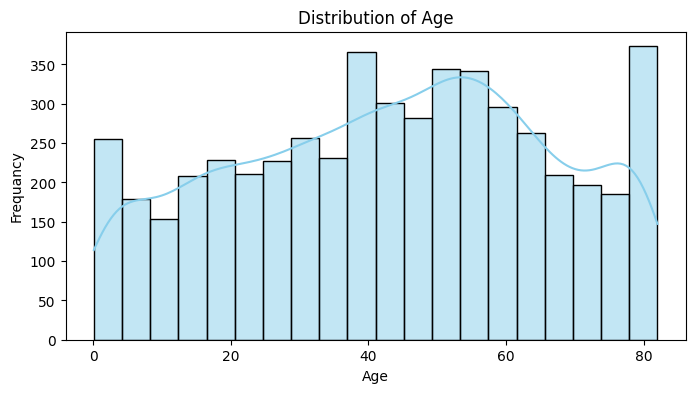

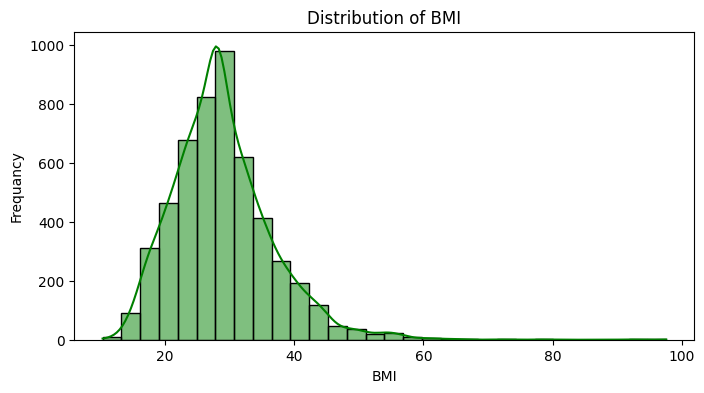

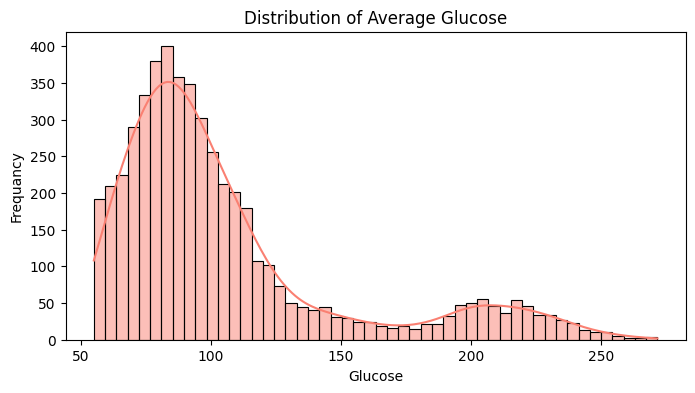

In [209]:
plt.figure(figsize=(8,4))
sns.histplot(df_be['age'],bins=20, kde= True, color='skyblue' )
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequancy')
plt.show()
plt.figure(figsize=(8,4))
sns.histplot(df_be['bmi'],bins=30, kde= True, color='green' )
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequancy')
plt.show()
plt.figure(figsize=(8,4))
sns.histplot(df_be['avg_glucose_level'],bins=50, kde= True, color='salmon' )
plt.title('Distribution of Average Glucose')
plt.xlabel('Glucose')
plt.ylabel('Frequancy')
plt.show()

Distribution of numerical features by output 'stroke'

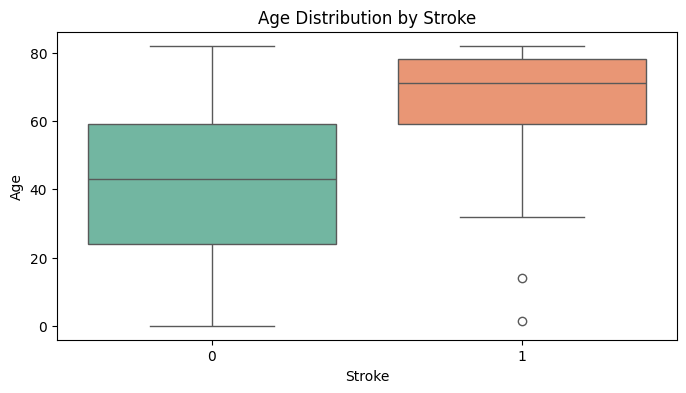

In [210]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df_be, x='stroke', y='age', palette='Set2')
plt.title('Age Distribution by Stroke')
plt.xlabel('Stroke')
plt.ylabel('Age')
plt.show()

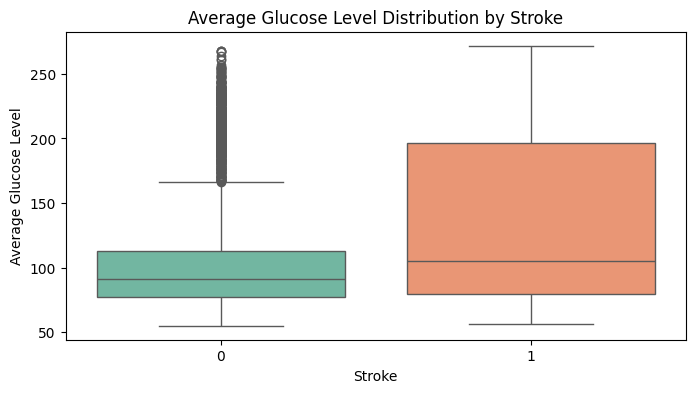

In [211]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df_be, x='stroke', y='avg_glucose_level', palette='Set2')
plt.title('Average Glucose Level Distribution by Stroke')
plt.xlabel('Stroke')
plt.ylabel('Average Glucose Level')
plt.show()

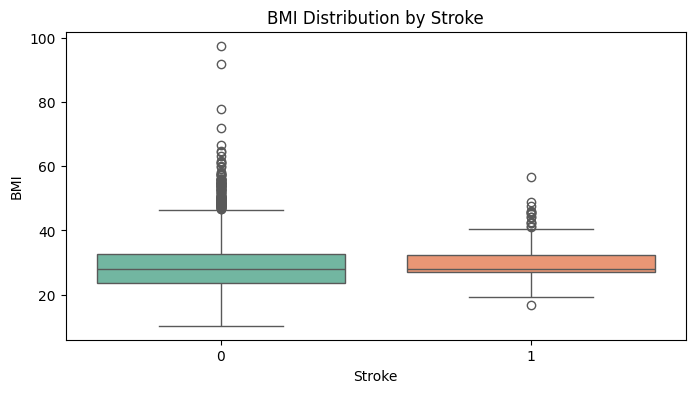

In [212]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df_be, x='stroke', y='bmi', palette='Set2')
plt.title('BMI Distribution by Stroke')
plt.xlabel('Stroke')
plt.ylabel('BMI')
plt.show()

Based on the above, we can notice that individuals who are older with higher glucose level were more likely to have a stroke. Also, we notice that bmi index might not be significant indicator for probability of getting a stroke

In [213]:
df_be.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## Encoding of dataset

  Enconding of Categorical features : Based on data type, we will use OneHotEncoder to avoid ordinalty assumptions. However, first column of each encoded feature will be dropped to reduce multicollinearity and reduce number of features

In [214]:
# categorical_variables = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
# categorical_data = df_be[categorical_variables]
# encoder = OneHotEncoder(sparse_output = False, drop ='first')
# encoded_data = encoder.fit_transform(categorical_data)
# encoded_dataframe = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_variables))
# df = pd.concat([df_be.drop(columns=categorical_variables), encoded_dataframe], axis=1)
# df.head(5)

In [215]:
df = pd.get_dummies(df_be, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True, dtype=int)
df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,1,1,0,1,0,0,1,1,0,0
1,61.0,0,0,202.21,28.1,1,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,1,1,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.0,1,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.1,0,0,1,0,1,0,0,1,0,1,0
5106,81.0,0,0,125.20,40.0,0,0,1,0,0,1,0,1,0,1,0
5107,35.0,0,0,82.99,30.6,0,0,1,0,0,1,0,0,0,1,0
5108,51.0,0,0,166.29,25.6,0,1,1,0,1,0,0,0,1,0,0


In [216]:
df.shape

(5109, 16)

In [217]:
df.isnull().sum()

age                               0
hypertension                      0
heart_disease                     0
avg_glucose_level                 0
bmi                               0
stroke                            0
gender_Male                       0
ever_married_Yes                  0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Urban              0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

In [218]:
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,1,1,0,1,0,0,1,1,0,0
1,61.0,0,0,202.21,28.1,1,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,1,1,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.0,1,0,1,0,0,1,0,0,0,1,0


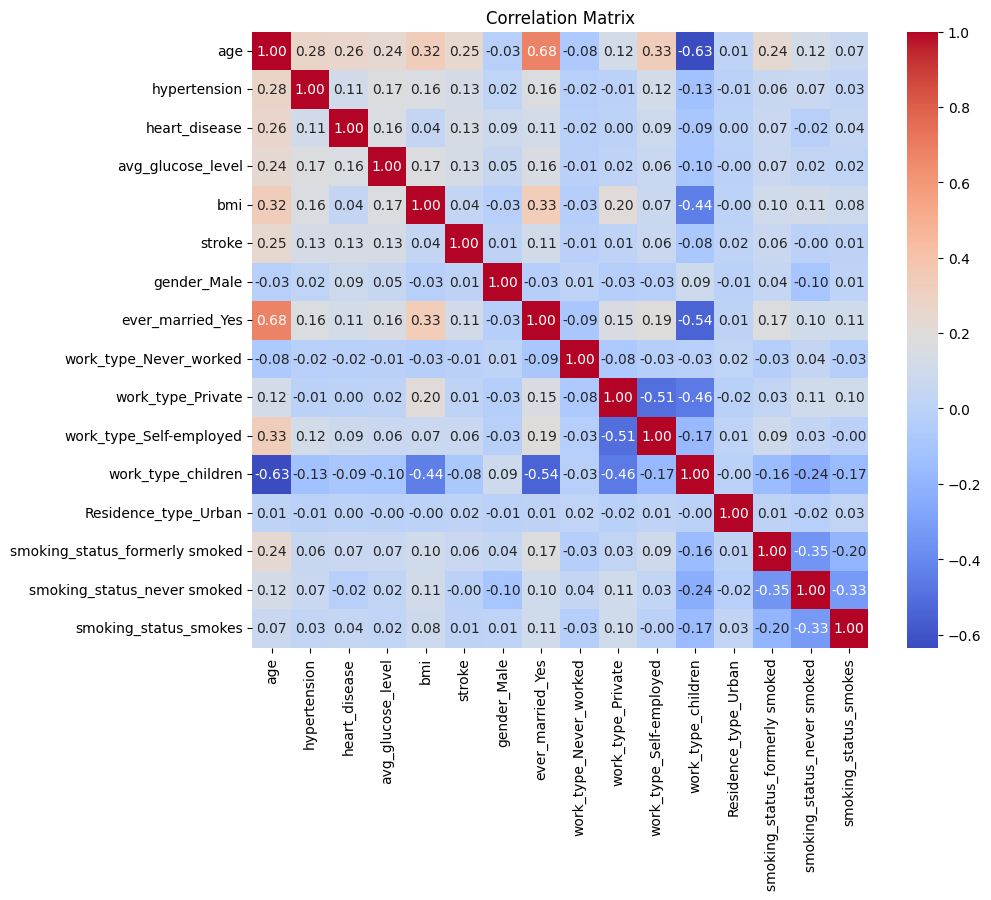

In [219]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()

* Maybe we should consider dropping (work_type_children) as its highly correlated with age, ever_married ?? Conifrm with team

Features Relatioship with the output stroke

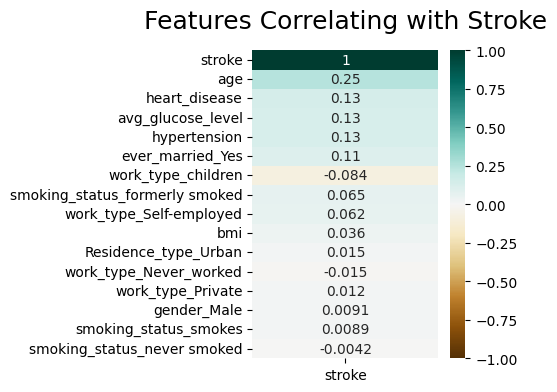

In [220]:
plt.figure(figsize=(3, 4))
heatmap = sns.heatmap(df.corr()[['stroke']].sort_values(by='stroke', key=abs, ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Stroke', fontdict={'fontsize':18}, pad=16);

Based on the above understanding of the features we notice that : age, heart disease, average glucose level, hypertension ,and marriage status are the mostly influenced features with stroke. However, smoking status, gender are the least correlated to stroke.

Based on the correlation matrix, we determined that the 'work_type_children' column can be dropped as it is highly correlated with other independent variables (i.e., age, ever_married_Yes). In addition, further analysis showed that it is not strongly correlated with the output variable, 'stroke'. Therefore, dropping this column may reduce some of the multicollinearity and will not have an affect on accurately predicting the target variable.  

In [221]:
df.drop(['work_type_children'], axis=1, inplace=True)

In [222]:
df.shape

(5109, 15)

## Outlier Detection

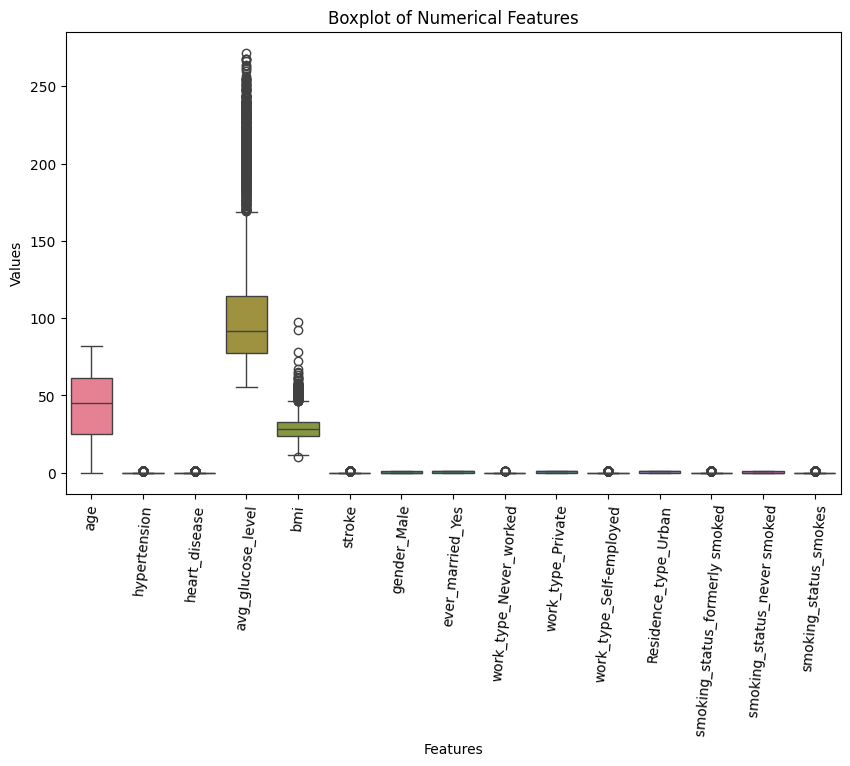

In [223]:
plt.figure(figsize = (10,6))
sns.boxplot(data=df)
plt.title('Boxplot of Numerical Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=85)  # Rotate x-axis labels for better readability
plt.show()

## Handling Skewness

In [224]:
df.skew().sort_values(ascending=False)

work_type_Never_worked            15.144843
stroke                             4.192807
heart_disease                      3.946786
hypertension                       2.715026
smoking_status_smokes              1.913132
work_type_Self-employed            1.852301
smoking_status_formerly smoked     1.729277
avg_glucose_level                  1.572815
bmi                                1.087929
smoking_status_never smoked        0.537226
gender_Male                        0.349410
Residence_type_Urban              -0.032506
age                               -0.137430
work_type_Private                 -0.292454
ever_married_Yes                  -0.658345
dtype: float64

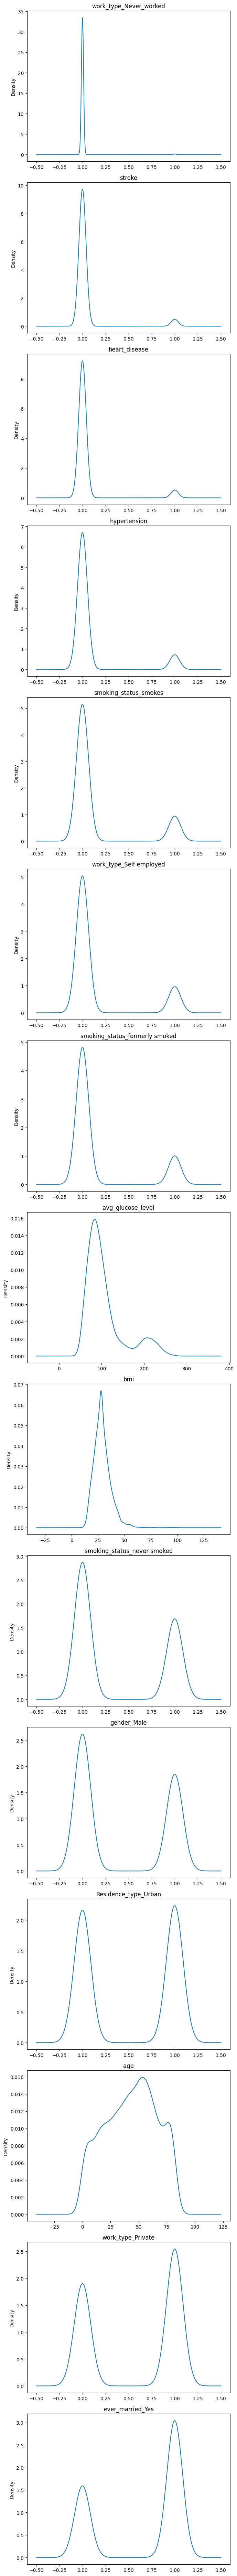

In [225]:
# Visualizing skewness for each attribute in the dataset
# List of parameters for density plot
parameters = ['work_type_Never_worked', 'stroke', 'heart_disease', 'hypertension',
              'smoking_status_smokes', 'work_type_Self-employed',
              'smoking_status_formerly smoked', 'avg_glucose_level', 'bmi',
              'smoking_status_never smoked', 'gender_Male', 'Residence_type_Urban',
              'age', 'work_type_Private', 'ever_married_Yes']

# Create subplots
fig, axes = plt.subplots(len(parameters), 1, figsize=(7, 5 * len(parameters)))

# Loop through parameters and plot density plots
for i, param in enumerate(parameters):
    df[param].plot(kind='density', ax=axes[i])
    axes[i].set_title(param)

plt.tight_layout()
plt.show()

In [226]:
# List of attributes to analyze
attributes = ['stroke', 'heart_disease', 'hypertension', 'avg_glucose_level', 'bmi',
    'age', 'gender_Male', 'Residence_type_Urban', 'ever_married_Yes',
    'work_type_Private', 'work_type_Self-employed',
    'work_type_Never_worked', 'smoking_status_smokes',
    'smoking_status_formerly smoked', 'smoking_status_never smoked']
# Dictionary to store skewness before and after transformations
skewness_results = {}

for attribute in attributes:
    try:
        # Display skewness before transformation
        attribute_skewness = df[attribute].skew()
        print(f"\nSkewness of '{attribute}': {attribute_skewness}")

        # Apply log transformation
        log_attribute = np.log1p(df[attribute])
        log_skewness = log_attribute.skew()
        print(f"Skewness after Log Transformation: {log_skewness}")

        # Apply sqrt transformation
        sqrt_attribute = df[attribute]**(1/2)
        sqrt_skewness = sqrt_attribute.skew()
        print(f"Skewness after Square Root Transformation: {sqrt_skewness}")

        # Apply reciprocal transformation
        reciprocal_attribute = 1 / df[attribute]
        reciprocal_skewness = reciprocal_attribute.skew()
        print(f"Skewness after Reciprocal Transformation: {reciprocal_skewness}")

        # Apply Box-Cox transformation
        bcx_attribute, _ = boxcox(df[attribute])
        bcx_skewness = pd.Series(bcx_attribute).skew()
        print(f"Skewness after Box-Cox Transformation: {bcx_skewness}")

        # Apply Yeo-Johnson transformation
        yf_attribute, _ = yeojohnson(df[attribute])
        yf_skewness = pd.Series(yf_attribute).skew()
        print(f"Skewness after Yeo-Johnson Transformation: {yf_skewness}")

        # Store skewness results in dictionary
        skewness_results[attribute] = {
            'Original': attribute_skewness,
            'Log': log_skewness,
            'Square Root': sqrt_skewness,
            'Reciprocal': reciprocal_skewness,
            'Box-Cox': bcx_skewness,
            'Yeo-Johnson': yf_skewness
        }
    except Exception as e:
        print(f"Error occurred while processing '{attribute}': {e}")


Skewness of 'stroke': 4.1928068074994735
Skewness after Log Transformation: 4.192806807499474
Skewness after Square Root Transformation: 4.1928068074994735
Skewness after Reciprocal Transformation: nan
Error occurred while processing 'stroke': Data must be positive.

Skewness of 'heart_disease': 3.9467864430646906
Skewness after Log Transformation: 3.9467864430646906
Skewness after Square Root Transformation: 3.9467864430646906
Skewness after Reciprocal Transformation: nan
Error occurred while processing 'heart_disease': Data must be positive.

Skewness of 'hypertension': 2.715026136949753
Skewness after Log Transformation: 2.7150261369497537
Skewness after Square Root Transformation: 2.715026136949753
Skewness after Reciprocal Transformation: nan
Error occurred while processing 'hypertension': Data must be positive.

Skewness of 'avg_glucose_level': 1.5728153284961561
Skewness after Log Transformation: 0.8900502459430992
Skewness after Square Root Transformation: 1.243310584696458
Sk

In [227]:
# ## Applying skewness from calculated
df['avg_glucose_level'], lambda_bc = boxcox(df['avg_glucose_level'])
df['bmi'], lambda_yj = yeojohnson(df['bmi'])

# df['avg_glucose_level'] = np.reciprocal(df['avg_glucose_level'])
# df['bmi'] = np.log(df['bmi'])

In [228]:
df.skew().sort_values(ascending=False)

work_type_Never_worked            15.144843
stroke                             4.192807
heart_disease                      3.946786
hypertension                       2.715026
smoking_status_smokes              1.913132
work_type_Self-employed            1.852301
smoking_status_formerly smoked     1.729277
smoking_status_never smoked        0.537226
gender_Male                        0.349410
avg_glucose_level                  0.083304
bmi                               -0.001035
Residence_type_Urban              -0.032506
age                               -0.137430
work_type_Private                 -0.292454
ever_married_Yes                  -0.658345
dtype: float64

## Label Selection

In [229]:
y = df['stroke']
x = df.drop('stroke',axis=1)

## Data Splitting

In [230]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Handling Imbalance in target variable

In [231]:
train_df = pd.concat([x_train, y_train], axis=1)

In [232]:
train_df.to_excel('train_dataset.xlsx', index=False)

In [233]:
pip install imbalanced-learn

In [234]:
smote = SMOTE(random_state=42)

In [235]:
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [236]:
x_resampled_df = pd.DataFrame(x_train_resampled, columns=x.columns)
y_resampled_df = pd.DataFrame(y_train_resampled, columns=['stroke'])

In [237]:
balanced_train_df = pd.concat([x_resampled_df, y_resampled_df], axis=1)

In [238]:
balanced_train_df.to_excel('balanced_dataset.xlsx', index=False)

## Data Splitting after SMOTE

In [239]:
y_train = balanced_train_df['stroke']
x_train = balanced_train_df.drop('stroke', axis=1)

## Normalization

In [240]:
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

In [241]:
scaled_x_train.shape

(7800, 14)

In [242]:
y_train.shape

(7800,)

## Principle Component Analysis

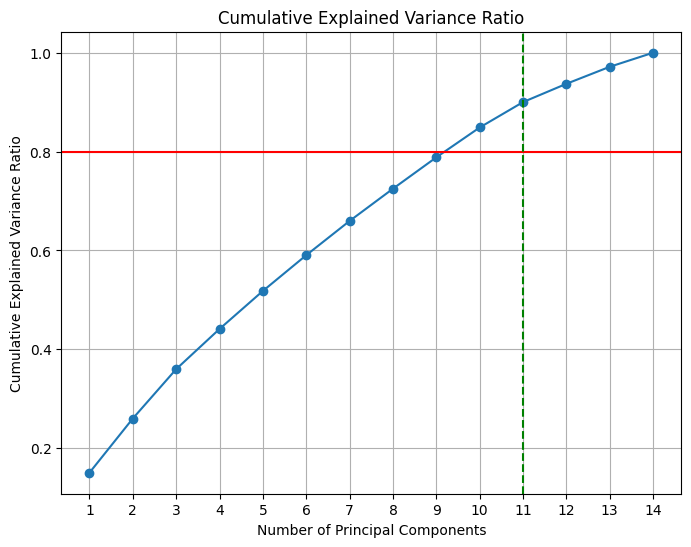

In [243]:
pca = PCA ()
pca.fit(scaled_x_train)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
n_components = np.arange(1, len(explained_variance_ratio) + 1)
index_80_percent = np.argmax(cumulative_variance_ratio >= 0.9) + 1

plt.figure(figsize=(8, 6))
plt.plot(n_components, cumulative_variance_ratio, marker='o', linestyle='-')
plt.axhline(y=0.8, color='r', linestyle='-')
plt.axvline(x=index_80_percent, color='g', linestyle='--')
plt.title('Cumulative Explained Variance Ratio')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.xticks(n_components)
plt.show()

In [244]:
# pca = PCA(n_components=11)
# X_train_pca = pca.fit_transform(scaled_x_train)
# X_val_pca = pca.fit_transform(scaled_x_val)
# X_test_pca = pca.transform(scaled_x_test)

# Model Training

## Support Vector Machine

In [245]:
svc = SVC(kernel='linear')
svc.fit(scaled_x_train, y_train_resampled)
predicted_output = svc.predict(scaled_x_test)
accuracy = metrics.accuracy_score(y_test, predicted_output) * 100
print("Accuracy:",accuracy,"%")

metrics_report = metrics.classification_report(y_test, predicted_output)
print(metrics_report)


Accuracy: 76.90802348336595 %
              precision    recall  f1-score   support

           0       0.96      0.79      0.86       960
           1       0.13      0.50      0.21        62

    accuracy                           0.77      1022
   macro avg       0.55      0.64      0.54      1022
weighted avg       0.91      0.77      0.82      1022



[[755 205]
 [ 31  31]]


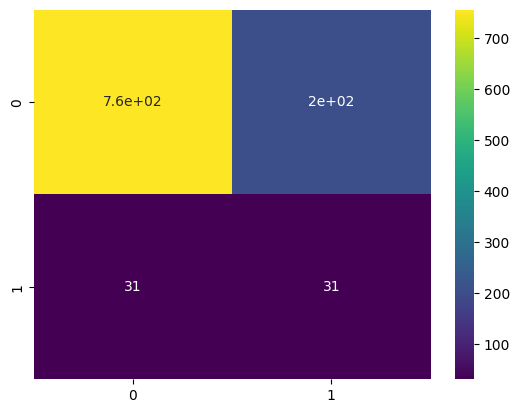

In [246]:
cmatrix = confusion_matrix(y_test,predicted_output)
print(cmatrix)

sns.heatmap(confusion_matrix(y_test,predicted_output),cmap='viridis',annot=True);

AUC value is: 0.5459578643205245


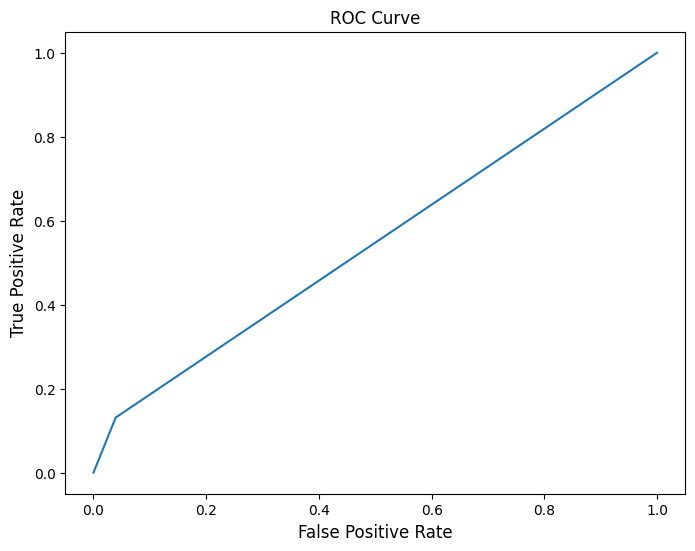

In [247]:
false_positive_rate, true_positive_rate, threshold = roc_curve(predicted_output, y_test)
plt.figure(figsize = (8, 6))
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel("False Positive Rate", size = 12)
plt.ylabel("True Positive Rate", size = 12)
plt.title("ROC Curve", size = 12)
auc_value = auc(false_positive_rate, true_positive_rate)
print("AUC value is:", auc_value)

## Logistic Regression

Accuracy: 78.47%
Confusion Matrix:
 [[774 186]
 [ 34  28]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.81      0.88       960
           1       0.13      0.45      0.20        62

    accuracy                           0.78      1022
   macro avg       0.54      0.63      0.54      1022
weighted avg       0.91      0.78      0.83      1022



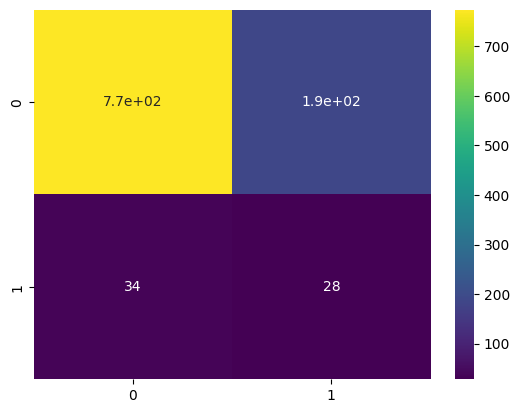

In [248]:


# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=42)

# fit the model with data
# logreg.fit(X_train_pca, y_train)
logreg.fit(scaled_x_train, y_train_resampled)

# y_pred = logreg.predict(X_test_pca)
y_pred = logreg.predict(scaled_x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
# print(cnf_matrix)

# metrics_report = metrics.classification_report(y_test, y_pred)
# print(metrics_report)

# evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test,y_pred),cmap='viridis',annot=True);

AUC value is: 0.5443809567872675


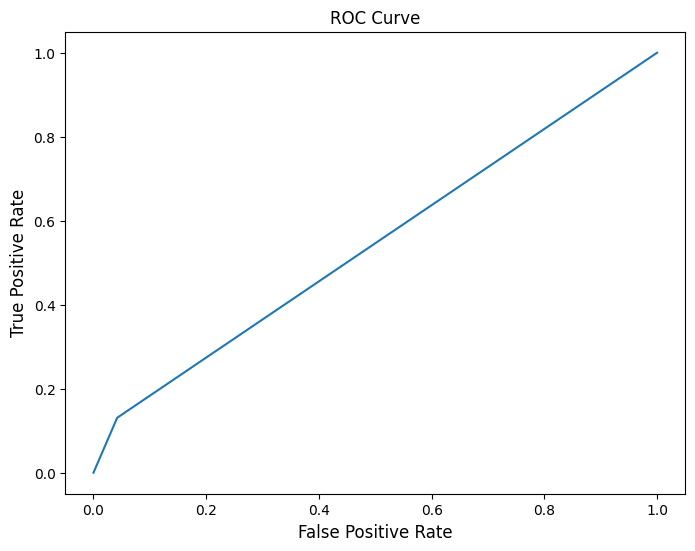

In [249]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_pred, y_test)
plt.figure(figsize = (8, 6))
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel("False Positive Rate", size = 12)
plt.ylabel("True Positive Rate", size = 12)
plt.title("ROC Curve", size = 12)
auc_value = auc(false_positive_rate, true_positive_rate)
print("AUC value is:", auc_value)

## Random Forest

In [250]:
randomforest = RandomForestClassifier()
rfc = RandomForestClassifier(max_features=7,max_depth=3,n_estimators=64,bootstrap=False)
rfc.fit(scaled_x_train,y_train_resampled)
rfc_tuned_pred = rfc.predict(scaled_x_test)
print(metrics.classification_report(y_test,rfc_tuned_pred))

print('Accuracy Score: ',accuracy_score(y_test,rfc_tuned_pred))

              precision    recall  f1-score   support

           0       0.99      0.70      0.82       960
           1       0.16      0.87      0.27        62

    accuracy                           0.71      1022
   macro avg       0.57      0.78      0.54      1022
weighted avg       0.94      0.71      0.78      1022

Accuracy Score:  0.7074363992172211


In [251]:
randomforest = RandomForestClassifier()
rfc = RandomForestClassifier(max_features=7,max_depth=20,n_estimators=64,bootstrap=False)
rfc.fit(scaled_x_train,y_train_resampled)
rfc_tuned_pred = rfc.predict(scaled_x_test)
print(metrics.classification_report(y_test,rfc_tuned_pred))

print('Accuracy Score: ',accuracy_score(y_test,rfc_tuned_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       960
           1       0.13      0.13      0.13        62

    accuracy                           0.90      1022
   macro avg       0.54      0.54      0.54      1022
weighted avg       0.89      0.90      0.89      1022

Accuracy Score:  0.8953033268101761


In [252]:
randomforest = RandomForestClassifier()
rfc = RandomForestClassifier(max_features=7,max_depth=10,n_estimators=64,bootstrap=False)
rfc.fit(scaled_x_train,y_train_resampled)
rfc_tuned_pred = rfc.predict(scaled_x_test)
print(metrics.classification_report(y_test,rfc_tuned_pred))

print('Accuracy Score: ',accuracy_score(y_test,rfc_tuned_pred))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92       960
           1       0.15      0.29      0.19        62

    accuracy                           0.85      1022
   macro avg       0.55      0.59      0.56      1022
weighted avg       0.90      0.85      0.88      1022

Accuracy Score:  0.8532289628180039


In [253]:
randomforest = RandomForestClassifier()
rfc = RandomForestClassifier(max_features=7,max_depth=15,n_estimators=64,bootstrap=False)
rfc.fit(scaled_x_train,y_train_resampled)
rfc_tuned_pred = rfc.predict(scaled_x_test)
print(metrics.classification_report(y_test,rfc_tuned_pred))

print('Accuracy Score: ',accuracy_score(y_test,rfc_tuned_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       960
           1       0.13      0.16      0.14        62

    accuracy                           0.88      1022
   macro avg       0.54      0.55      0.54      1022
weighted avg       0.90      0.88      0.89      1022

Accuracy Score:  0.8835616438356164


In [254]:
randomforest = RandomForestClassifier()
rfc = RandomForestClassifier(max_features=7,max_depth=7,n_estimators=64,bootstrap=False)
rfc.fit(scaled_x_train,y_train_resampled)
rfc_tuned_pred = rfc.predict(scaled_x_test)
print(metrics.classification_report(y_test,rfc_tuned_pred))

print('Accuracy Score: ',accuracy_score(y_test,rfc_tuned_pred))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90       960
           1       0.18      0.55      0.27        62

    accuracy                           0.82      1022
   macro avg       0.57      0.69      0.58      1022
weighted avg       0.92      0.82      0.86      1022

Accuracy Score:  0.8189823874755382


### Hyper parameter tuning for Random Foorest using Grid Search

In [255]:
n_estimators =[64,100,128,200]
max_features = [2,3,5,7]
bootstrap = [True,False]
max_depth = [3,7,10,15,20,30]

param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap,
              'max_depth':max_depth}

In [256]:
randomforest = RandomForestClassifier()

grid = GridSearchCV(randomforest,param_grid)

grid.fit(scaled_x_train,y_train_resampled)
grid.best_params_

{'bootstrap': False, 'max_depth': 20, 'max_features': 5, 'n_estimators': 200}

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       960
           1       0.13      0.13      0.13        62

    accuracy                           0.90      1022
   macro avg       0.54      0.54      0.54      1022
weighted avg       0.89      0.90      0.89      1022

Accuracy Score:  89.53033268101761 %
[[907  53]
 [ 54   8]]


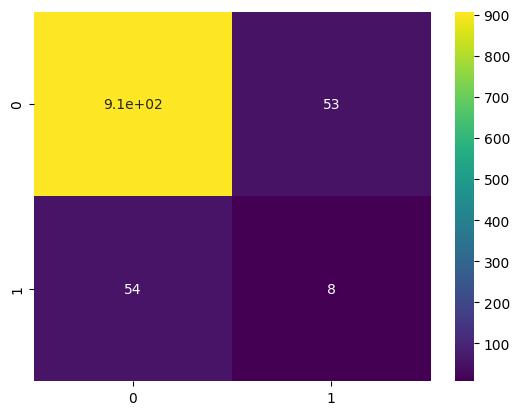

In [257]:
rfc = RandomForestClassifier(max_features=5,n_estimators=200,bootstrap=False, max_depth=20)
rfc.fit(scaled_x_train,y_train_resampled)

rfc_tuned_pred = rfc.predict(scaled_x_test)
print(metrics.classification_report(y_test,rfc_tuned_pred))
accuracy = accuracy_score(y_test,rfc_tuned_pred)
print('Accuracy Score: ',accuracy*100,"%")

cmatrix = confusion_matrix(y_test,rfc_tuned_pred)
print(cmatrix)

sns.heatmap(confusion_matrix(y_test,rfc_tuned_pred),cmap='viridis',annot=True);

AUC value is: 0.5374780368809812


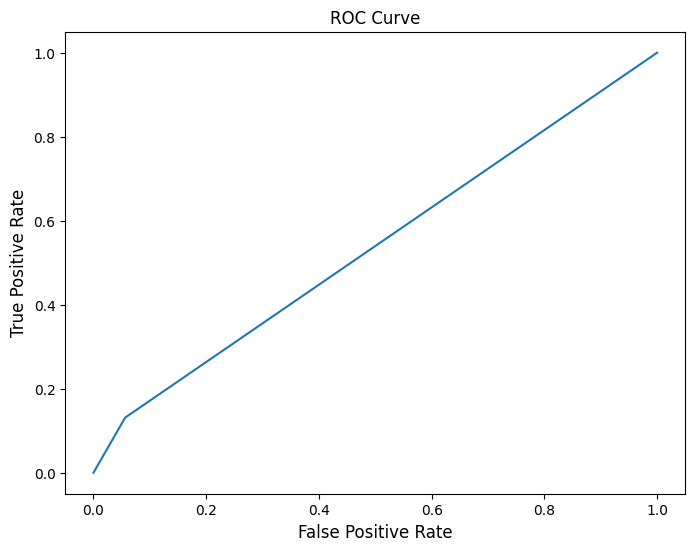

In [258]:
false_positive_rate, true_positive_rate, threshold = roc_curve(rfc_tuned_pred, y_test)
plt.figure(figsize = (8, 6))
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel("False Positive Rate", size = 12)
plt.ylabel("True Positive Rate", size = 12)
plt.title("ROC Curve", size = 12)
auc_value = auc(false_positive_rate, true_positive_rate)
print("AUC value is:", auc_value)

## Naive Bayes

Accuracy for Gaussian is 18.493150684931507
Confusion Matrix:
 [[127 833]
 [  0  62]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.13      0.23       960
           1       0.07      1.00      0.13        62

    accuracy                           0.18      1022
   macro avg       0.53      0.57      0.18      1022
weighted avg       0.94      0.18      0.23      1022



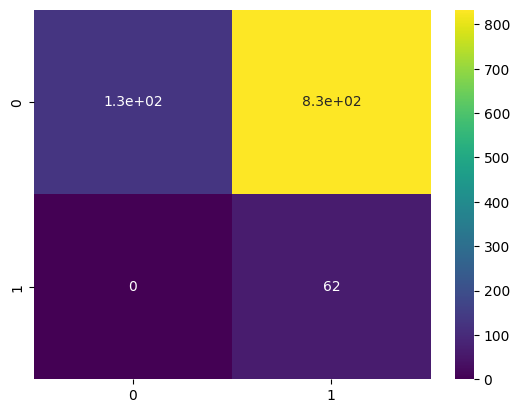

In [181]:
gaussian_model=GaussianNB()
gaussian_model.fit(scaled_x_train, y_train_resampled)
predicted1 = gaussian_model.predict(scaled_x_test)

print("Accuracy for Gaussian is",accuracy_score(y_test,predicted1)*100)
print("Confusion Matrix:\n", confusion_matrix(y_test, predicted1))
print("\nClassification Report:\n", classification_report(y_test, predicted1))

sns.heatmap(confusion_matrix(y_test,predicted1),cmap='viridis',annot=True);

AUC value is: 0.5346368715083799


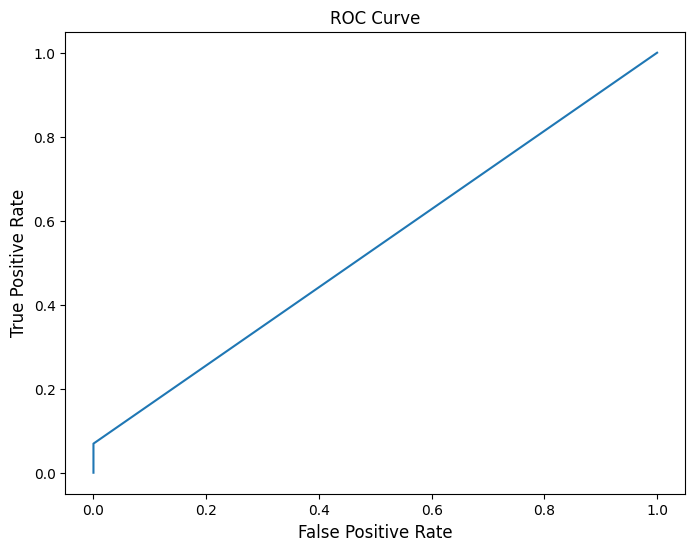

In [182]:
false_positive_rate, true_positive_rate, threshold = roc_curve(predicted1, y_test)
plt.figure(figsize = (8, 6))
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel("False Positive Rate", size = 12)
plt.ylabel("True Positive Rate", size = 12)
plt.title("ROC Curve", size = 12)
auc_value = auc(false_positive_rate, true_positive_rate)
print("AUC value is:", auc_value)

Accuracy for Bernoulli is 69.86301369863014
Confusion Matrix:
 [[662 298]
 [ 10  52]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.69      0.81       960
           1       0.15      0.84      0.25        62

    accuracy                           0.70      1022
   macro avg       0.57      0.76      0.53      1022
weighted avg       0.93      0.70      0.78      1022



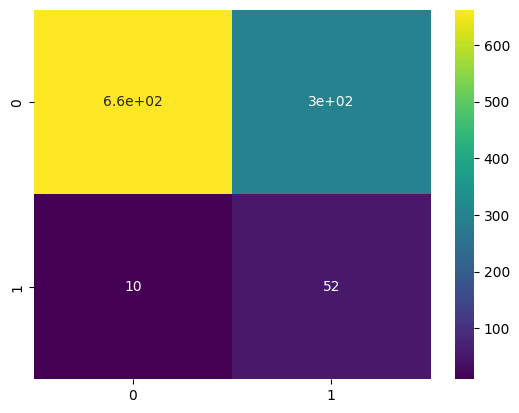

In [183]:
bernoulli_model=BernoulliNB()
bernoulli_model.fit(scaled_x_train,y_train_resampled)
predicted2=bernoulli_model.predict(scaled_x_test)
print("Accuracy for Bernoulli is",accuracy_score(y_test,predicted2)*100)
print("Confusion Matrix:\n", confusion_matrix(y_test, predicted2))
print("\nClassification Report:\n", classification_report(y_test, predicted2))

sns.heatmap(confusion_matrix(y_test,predicted2),cmap='viridis',annot=True);

AUC value is: 0.5668452380952381


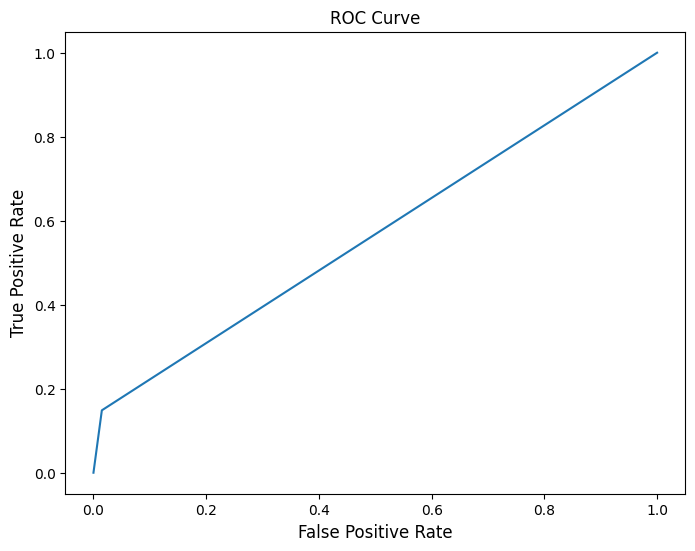

In [184]:
false_positive_rate, true_positive_rate, threshold = roc_curve(predicted2, y_test)
plt.figure(figsize = (8, 6))
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel("False Positive Rate", size = 12)
plt.ylabel("True Positive Rate", size = 12)
plt.title("ROC Curve", size = 12)
auc_value = auc(false_positive_rate, true_positive_rate)
print("AUC value is:", auc_value)

In [62]:
## ValueError: Negative values in data passed to MultinomialNB (input X)
# multinomial_model=MultinomialNB()
# multinomial_model.fit(scaled_x_train,y_train)
# predicted3=multinomial_model.predict(scaled_x_test)
# print("Accuracy for Multinomial is",accuracy_score(y_test,predicted3)*100)
# print("Confusion Matrix:\n", confusion_matrix(y_test, predicted3))
# print("\nClassification Report:\n", classification_report(y_test, predicted3))

# sns.heatmap(confusion_matrix(y_test,predicted3),cmap='viridis',annot=True);

## Multi Layer Perceptron

# Validation Splitting

In [174]:
x_train, x_validation, y_train, y_validation = train_test_split(scaled_x_train, y_train, test_size=0.1, random_state=42)

In [81]:
model = Sequential()
model.add(Dense(10, input_shape=(14,),activation = 'leaky_relu'))
model.add(Dense(1, activation='sigmoid'))


# Compile the model and calculate its accuracy:
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

# Print a summary of the Keras model:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                150       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 161 (644.00 Byte)
Trainable params: 161 (644.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [82]:
history = model.fit(x=x_train,y=y_train,validation_data=(x_validation,y_validation),batch_size = 64, epochs=50, verbose=1)

Epoch 1/50
110/110 [==============================] - 1s 4ms/step - loss: 0.3614 - accuracy: 0.3073 - val_loss: 0.3283 - val_accuracy: 0.3474
Epoch 2/50
110/110 [==============================] - 0s 2ms/step - loss: 0.3194 - accuracy: 0.3826 - val_loss: 0.2938 - val_accuracy: 0.4359
Epoch 3/50
110/110 [==============================] - 0s 2ms/step - loss: 0.2874 - accuracy: 0.4369 - val_loss: 0.2684 - val_accuracy: 0.4744
Epoch 4/50
110/110 [==============================] - 0s 3ms/step - loss: 0.2634 - accuracy: 0.4893 - val_loss: 0.2496 - val_accuracy: 0.5269
Epoch 5/50
110/110 [==============================] - 0s 2ms/step - loss: 0.2453 - accuracy: 0.5457 - val_loss: 0.2354 - val_accuracy: 0.5872
Epoch 6/50
110/110 [==============================] - 0s 2ms/step - loss: 0.2311 - accuracy: 0.5846 - val_loss: 0.2241 - val_accuracy: 0.6077
Epoch 7/50
110/110 [==============================] - 0s 2ms/step - loss: 0.2196 - accuracy: 0.6199 - val_loss: 0.2149 - val_accuracy: 0.6333
Epoch 

In [83]:

y_pred = model.predict(scaled_x_test)
y_pred=(y_pred>0.5).astype(int)
print(confusion_matrix(y_pred,y_test))
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Deep Learning Accuracy Score: ",accuracy)
print("Deep Learning Precision Score: ",precision)
print("Deep Learning Recall Score: ",recall)

32/32 [==============================] - 0s 4ms/step
[[749  30]
 [211  32]]
Deep Learning Accuracy Score:  0.764187866927593
Deep Learning Precision Score:  0.13168724279835392
Deep Learning Recall Score:  0.5161290322580645


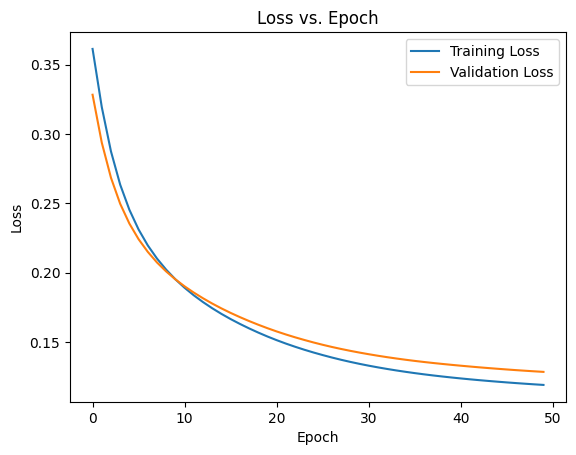

In [84]:
plt.plot(history.history['loss'], label='Training Loss')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.legend()
plt.show()

### Hyper Parameter Tuning for MLP

Model 1

In [85]:

model_1 = Sequential()
model_1.add(Dense(12, input_shape=(14,),activation = 'leaky_relu'))
model_1.add(Dense(8,activation = 'leaky_relu'))
model_1.add(Dense(6,activation = 'leaky_relu'))
model_1.add(Dense(1, activation='sigmoid'))


# Compile the model and calculate its accuracy:
model_1.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

# Print a summary of the Keras model:
model_1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 12)                180       
                                                                 
 dense_7 (Dense)             (None, 8)                 104       
                                                                 
 dense_8 (Dense)             (None, 6)                 54        
                                                                 
 dense_9 (Dense)             (None, 1)                 7         
                                                                 
Total params: 345 (1.35 KB)
Trainable params: 345 (1.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [86]:
history_1 = model_1.fit(x=x_train,y=y_train,validation_data=(x_validation,y_validation),batch_size = 32, epochs=50, verbose=1)

y_pred = model_1.predict(scaled_x_test)
y_pred=(y_pred>0.5).astype(int)
print(confusion_matrix(y_pred,y_test))
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Deep Learning Accuracy Score: ",accuracy)
print("Deep Learning Precision Score: ",precision)
print("Deep Learning Recall Score: ",recall)

Epoch 1/50
220/220 [==============================] - 2s 4ms/step - loss: 0.5510 - accuracy: 0.7296 - val_loss: 0.4397 - val_accuracy: 0.7962
Epoch 2/50
220/220 [==============================] - 1s 2ms/step - loss: 0.3947 - accuracy: 0.8246 - val_loss: 0.3853 - val_accuracy: 0.8205
Epoch 3/50
220/220 [==============================] - 1s 3ms/step - loss: 0.3639 - accuracy: 0.8439 - val_loss: 0.3730 - val_accuracy: 0.8282
Epoch 4/50
220/220 [==============================] - 1s 3ms/step - loss: 0.3518 - accuracy: 0.8558 - val_loss: 0.3629 - val_accuracy: 0.8410
Epoch 5/50
220/220 [==============================] - 1s 3ms/step - loss: 0.3440 - accuracy: 0.8587 - val_loss: 0.3585 - val_accuracy: 0.8436
Epoch 6/50
220/220 [==============================] - 1s 3ms/step - loss: 0.3368 - accuracy: 0.8621 - val_loss: 0.3535 - val_accuracy: 0.8526
Epoch 7/50
220/220 [==============================] - 1s 2ms/step - loss: 0.3314 - accuracy: 0.8634 - val_loss: 0.3527 - val_accuracy: 0.8590
Epoch 

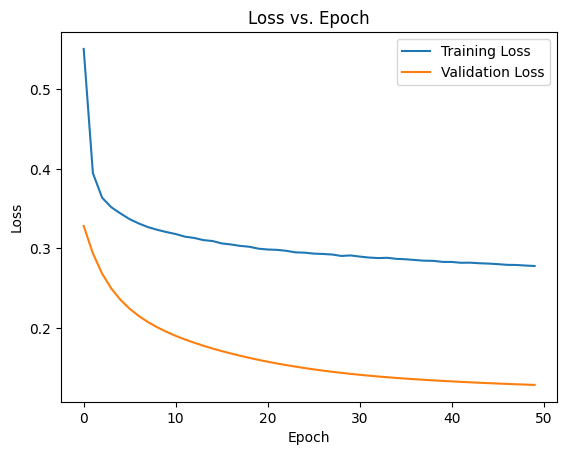

In [87]:
plt.plot(history_1.history['loss'], label='Training Loss')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.legend()
plt.show()

## Model 2

In [91]:
model_2 = Sequential()
model_2.add(Dense(12, input_shape=(14,),activation = 'relu'))
# model_1.add(Dense(12, input_shape=(14,),activation = 'leaky_relu'))
# model_1.add(Dense(6, input_shape=(14,),activation = 'leaky_relu'))
model_2.add(Dense(1, activation='sigmoid'))


# Compile the model and calculate its accuracy:
model_2.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Print a summary of the Keras model:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 12)                180       
                                                                 
 dense_13 (Dense)            (None, 1)                 13        
                                                                 
Total params: 193 (772.00 Byte)
Trainable params: 193 (772.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [92]:
history_2 = model_2.fit(x=x_train,y=y_train,validation_data=(x_validation,y_validation),batch_size = 32, epochs=50, verbose=1)

y_pred = model_2.predict(scaled_x_test)
y_pred=(y_pred>0.5).astype(int)
print(confusion_matrix(y_pred,y_test))
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Deep Learning Accuracy Score: ",accuracy)
print("Deep Learning Precision Score: ",precision)
print("Deep Learning Recall Score: ",recall)

Epoch 1/50
220/220 [==============================] - 2s 6ms/step - loss: 0.7588 - accuracy: 0.4980 - val_loss: 0.6388 - val_accuracy: 0.6359
Epoch 2/50
220/220 [==============================] - 1s 4ms/step - loss: 0.6146 - accuracy: 0.6503 - val_loss: 0.5682 - val_accuracy: 0.7192
Epoch 3/50
220/220 [==============================] - 1s 4ms/step - loss: 0.5511 - accuracy: 0.7282 - val_loss: 0.5222 - val_accuracy: 0.7667
Epoch 4/50
220/220 [==============================] - 1s 4ms/step - loss: 0.5060 - accuracy: 0.7704 - val_loss: 0.4859 - val_accuracy: 0.7910
Epoch 5/50
220/220 [==============================] - 1s 3ms/step - loss: 0.4710 - accuracy: 0.7875 - val_loss: 0.4580 - val_accuracy: 0.8090
Epoch 6/50
220/220 [==============================] - 0s 2ms/step - loss: 0.4436 - accuracy: 0.8021 - val_loss: 0.4361 - val_accuracy: 0.8141
Epoch 7/50
220/220 [==============================] - 0s 2ms/step - loss: 0.4221 - accuracy: 0.8128 - val_loss: 0.4192 - val_accuracy: 0.8218
Epoch 

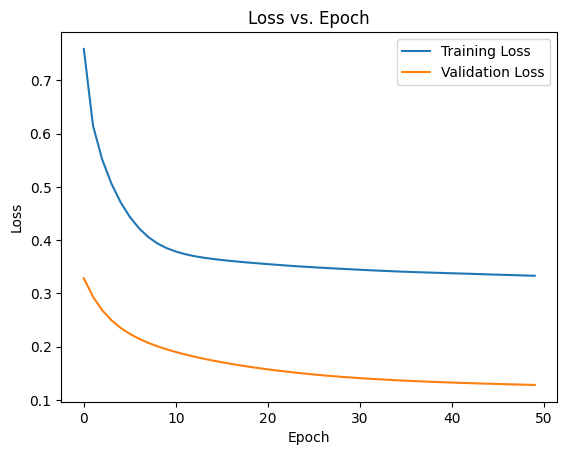

In [93]:
plt.plot(history_2.history['loss'], label='Training Loss')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.legend()
plt.show()

## Grid search

In [ ]:
# Define a function to create the Keras model
def create_model(optimizer='sgd'):
    model = Sequential()
    model.add(Dense(12, input_shape=(14,), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Create a KerasClassifier based on your model function
model = KerasClassifier(build_fn=create_model)

# Define the grid search parameters
param_grid = {
    'batch_size': [10, 20, 40,50,60,70],
    'epochs': [10, 50, 100],
    'optimizer': ['sgd', 'adam']
}

# Create the GridSearchCV object
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)

# Fit the grid search using your data
grid_result = grid.fit(X_train, y_train)

# Print the best parameters and accuracy
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


## MLP Classifier

In [67]:

#Initializing the MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(12,8,6), max_iter=100,activation = 'relu',solver='adam',random_state=42, early_stopping= True,
                           verbose=True, validation_fraction=0.1, n_iter_no_change=10, tol=1e-4)




In [68]:
#Fitting the training data to the network
cls = classifier.fit(x_train, y_train)

#Predicting y for X_val
y_pred = cls.predict(scaled_x_test)


Iteration 1, loss = 1.19146431
Validation score: 0.500000
Iteration 2, loss = 0.72353394
Validation score: 0.735897
Iteration 3, loss = 0.64624355
Validation score: 0.662821
Iteration 4, loss = 0.62246633
Validation score: 0.702564
Iteration 5, loss = 0.60272886
Validation score: 0.734615
Iteration 6, loss = 0.55185417
Validation score: 0.766667
Iteration 7, loss = 0.49300556
Validation score: 0.778205
Iteration 8, loss = 0.45923637
Validation score: 0.783333
Iteration 9, loss = 0.44301461
Validation score: 0.782051
Iteration 10, loss = 0.43391202
Validation score: 0.794872
Iteration 11, loss = 0.42869830
Validation score: 0.780769
Iteration 12, loss = 0.42212171
Validation score: 0.789744
Iteration 13, loss = 0.41852086
Validation score: 0.783333
Iteration 14, loss = 0.41759827
Validation score: 0.794872
Iteration 15, loss = 0.41233202
Validation score: 0.800000
Iteration 16, loss = 0.40863574
Validation score: 0.794872
Iteration 17, loss = 0.40800616
Validation score: 0.807692
Iterat

In [69]:
cm = confusion_matrix(y_pred, y_test)

accuracy = accuracy_score(y_pred, y_test)
print(f'Accuracy: {accuracy}')

class_report = classification_report(y_pred, y_test)
print('Classification Report:')
print(class_report)

cm = confusion_matrix(y_pred, y_test)
print('Confusion Matrix:')
print(cm)

Accuracy: 0.8287671232876712
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.91       903
           1       0.05      0.03      0.03       119

    accuracy                           0.83      1022
   macro avg       0.46      0.48      0.47      1022
weighted avg       0.78      0.83      0.80      1022

Confusion Matrix:
[[844  59]
 [116   3]]


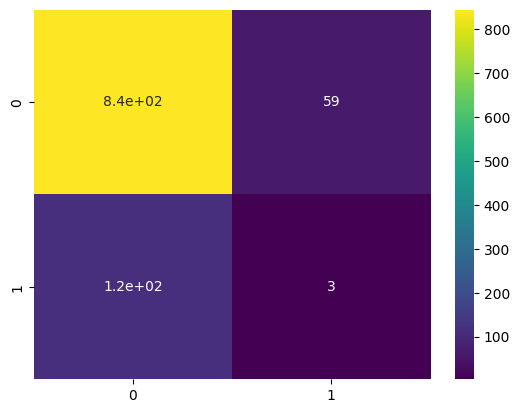

In [70]:
sns.heatmap(cm,cmap='viridis',annot=True);

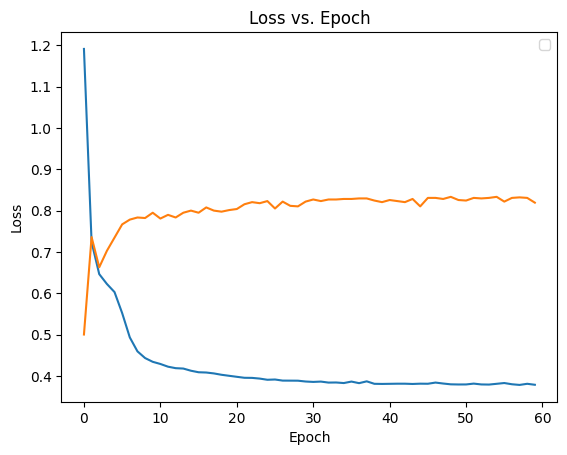

In [71]:
plt.plot(classifier.loss_curve_)
plt.plot(classifier.validation_scores_)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.legend()
plt.show()

## MLP -2

Iteration 1, loss = 0.90751773
Validation score: 0.589744
Iteration 2, loss = 0.61763127
Validation score: 0.730769
Iteration 3, loss = 0.55684217
Validation score: 0.758974
Iteration 4, loss = 0.51215518
Validation score: 0.788462
Iteration 5, loss = 0.48017409
Validation score: 0.800000
Iteration 6, loss = 0.45414955
Validation score: 0.794872
Iteration 7, loss = 0.43368514
Validation score: 0.793590
Iteration 8, loss = 0.41659100
Validation score: 0.802564
Iteration 9, loss = 0.40800888
Validation score: 0.805128
Iteration 10, loss = 0.40196225
Validation score: 0.798718
Iteration 11, loss = 0.40259727
Validation score: 0.807692
Iteration 12, loss = 0.39443417
Validation score: 0.808974
Iteration 13, loss = 0.39406423
Validation score: 0.801282
Iteration 14, loss = 0.39730727
Validation score: 0.812821
Iteration 15, loss = 0.38691653
Validation score: 0.810256
Iteration 16, loss = 0.38715992
Validation score: 0.802564
Iteration 17, loss = 0.39116926
Validation score: 0.812821
Iterat

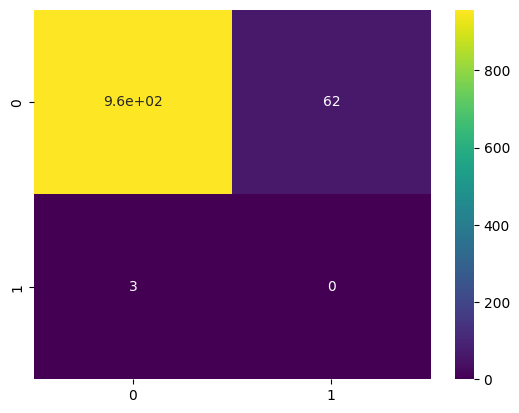

In [72]:
#Initializing the MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(14,8), max_iter=100,activation = 'relu',solver='adam',random_state=42, early_stopping= True,
                           verbose=True, validation_fraction=0.1, n_iter_no_change=15, tol=1e-4)

#Fitting the training data to the network
cls = classifier.fit(x_train, y_train)

#Predicting y for X_val
y_pred = cls.predict(scaled_x_test)

cm = confusion_matrix(y_pred, y_test)

accuracy = accuracy_score(y_pred, y_test)
print(f'Accuracy: {accuracy}')

class_report = classification_report(y_pred, y_test)
print('Classification Report:')
print(class_report)

cm = confusion_matrix(y_pred, y_test)
print('Confusion Matrix:')
print(cm)

sns.heatmap(cm,cmap='viridis',annot=True);

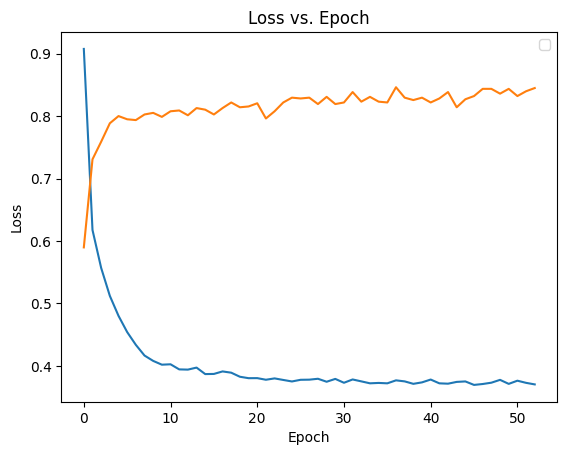

In [73]:
plt.plot(classifier.loss_curve_)
plt.plot(classifier.validation_scores_)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.legend()
plt.show()

## MLP -3

Accuracy: 0.8444227005870841
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       921
           1       0.03      0.02      0.02       101

    accuracy                           0.84      1022
   macro avg       0.46      0.48      0.47      1022
weighted avg       0.81      0.84      0.83      1022

Confusion Matrix:
[[861  60]
 [ 99   2]]


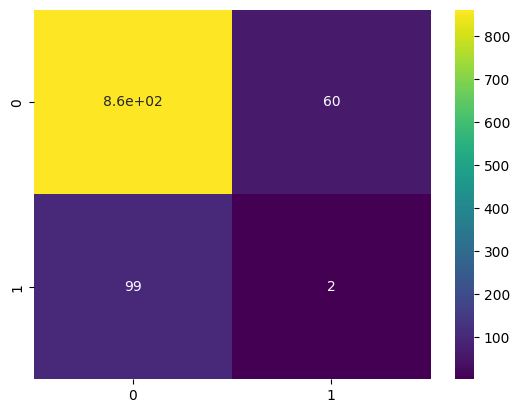

In [74]:
#Initializing the MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(4), max_iter=100,activation = 'relu',solver='adam',random_state=42, early_stopping= True,
                           verbose=False, validation_fraction=0.1, n_iter_no_change=15, tol=1e-4)

#Fitting the training data to the network
cls = classifier.fit(x_train, y_train)

#Predicting y for X_val
y_pred = cls.predict(scaled_x_test)

cm = confusion_matrix(y_pred, y_test)

accuracy = accuracy_score(y_pred, y_test)
print(f'Accuracy: {accuracy}')

class_report = classification_report(y_pred, y_test)
print('Classification Report:')
print(class_report)

cm = confusion_matrix(y_pred, y_test)
print('Confusion Matrix:')
print(cm)

sns.heatmap(cm,cmap='viridis',annot=True);

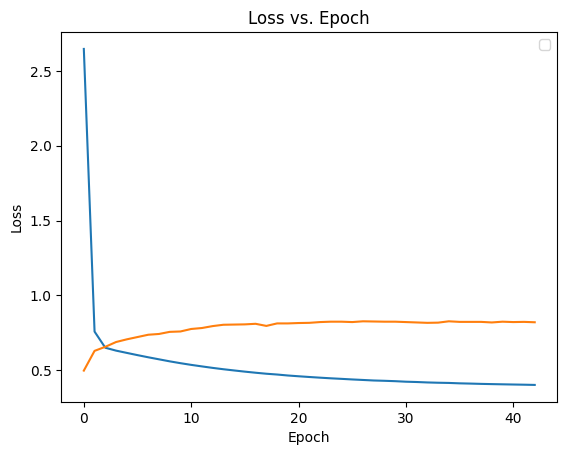

In [75]:
plt.plot(classifier.loss_curve_)
plt.plot(classifier.validation_scores_)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.legend()
plt.show()